In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
!{sys.executable} -m pip install psutil

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 449 kB 4.8 MB/s eta 0:00:01
  Created wheel for psutil: filename=psutil-5.7.0-cp27-cp27mu-linux_x86_64.whl size=270078 sha256=e97145ad88a826ec24f62b7c8d76382172b718b307858c475c6404eeedbe7aa6
  Stored in directory: /home/juan/.cache/pip/wheels/f9/56/38/19f36601aa467e1093012b7993246e803c6a03f204082fa046
Successfully built psutil


In [4]:
import os, psutil

In [5]:
pid = os.getpid()
print(pid)

8582


In [6]:
ps= psutil.Process(pid)
memUse = ps.memory_info()
print(memUse)

pmem(rss=80687104, vms=928010240, shared=20729856, text=8192, lib=0, data=396627968, dirty=0)


In [15]:
print (memUse.vms , memUse.rss)

(928010240, 80687104)


In [12]:
from pybdm import BDM
from pybdm.algorithms import PerturbationExperiment

In [9]:
# Create a dataset (must be of integer type)
X = np.ones((100, 100), dtype=int)

In [13]:
# Initialize BDM object
bdm = BDM(ndim=2)

# Compute BDM
new_feat = bdm.bdm(X)

# BDM objects may also compute standard Shannon entropy in base 2
new_ent = bdm.ent(X)

In [14]:
print(new_feat,new_ent)

18874.48607108777 9.281312379549453


In [25]:
# Here is an example applied to an adjacency matrix
# (only 1's are perturbed and switched to 0's)
# (so perturbations correspond to edge deletions)
X = np.random.randint(0, 2, (100, 100))
#X = np.ones((100, 100), dtype=int)
bdm = BDM(ndim=2)
# Indices of nonzero entries in the matrix
idx = np.argwhere(X)
# PerturbationExperiment can be instantiated without passing data
pe = PerturbationExperiment(bdm, metric='bdm')
# data can be added later
pe.set_data(X)
# Run experiment and perturb edges
# No values argument is passed so perturbations automatically switch
# values to other values from the alphabet (in this case 1 --> 0)
delta_bdm = pe.run(idx)

In [28]:
print(shape(delta_bdm))
print(idx)

(5113,)
[[ 0  0]
 [ 0  3]
 [ 0  5]
 ...
 [99 97]
 [99 98]
 [99 99]]


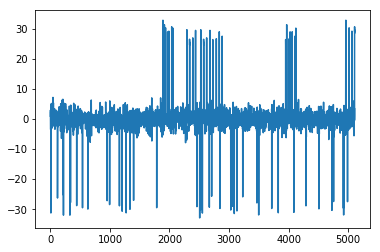

In [27]:
plot(delta_bdm)

In [11]:
import numpy as np
from pybdm import BDM
from pybdm.algorithms import PerturbationExperiment
import matplotlib.pyplot as plt

In [2]:
# Create a dataset (must be of integer type)
X = np.ones((100, 100), dtype=int)

In [3]:
# Initialize BDM object
bdm = BDM(ndim=2)

In [4]:
# Initialize perturbation experiment object
# (may be run for both bdm or entropy)
perturbation = PerturbationExperiment(bdm, X, metric='bdm')

In [5]:
# Compute BDM change for all data points
delta_bdm = perturbation.run()

<class 'numpy.ndarray'>
(10000,)


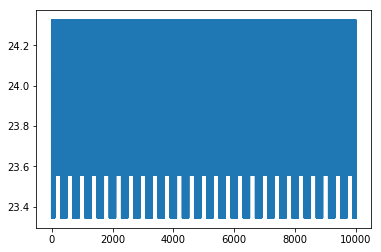

In [12]:
print(type(delta_bdm))
print(delta_bdm.shape)
plt.plot(delta_bdm)

In [13]:
# Compute BDM change for selected data points and keep the changes while running
# One array provide indices of elements that are to be change.
idx = np.array([[0, 0], [10, 10]], dtype=int)
# Another array provide new values to assign.
# Negative values mean that new values will be selected
# randomly from the set of other possible values from the alphabet.
values = np.array([-1, -1], dtype=int)
delta_bdm = perturbation.run(idx, values, keep_changes=True)

(2,)


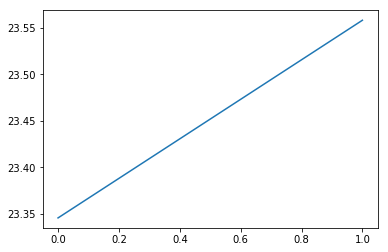

In [14]:
print(delta_bdm.shape)
plt.plot(delta_bdm)

In [15]:
# Here is an example applied to an adjacency matrix
# (only 1's are perturbed and switched to 0's)
# (so perturbations correspond to edge deletions)
X = np.random.randint(0, 2, (100, 100))

In [16]:
# Indices of nonzero entries in the matrix
idx = np.argwhere(X)

In [17]:
# PerturbationExperiment can be instantiated without passing data
pe = PerturbationExperiment(bdm, metric='bdm')

In [18]:
# data can be added later
pe.set_data(X)

In [19]:
# Run experiment and perturb edges
# No values argument is passed so perturbations automatically switch
# values to other values from the alphabet (in this case 1 --> 0)
delta_bdm = pe.run(idx)

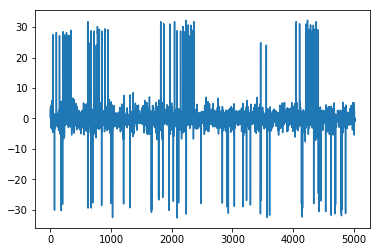

In [20]:
plt.plot(delta_bdm)

Parts which after yield negative contribution to the overall complexity after change are likely to be important for the system, since their removal make it more noisy. On the other hand parts that yield positive contribution to the overall complexity after change are likely to be noise since they extend the system’s description length.